# Projekt zaliczeniowy - Statystyka i Bazy Danych

## Przygotowanie struktury bazy danych

In [1]:
import pandas as pd
import numpy as np
import MySQLdb
import sqlalchemy as db
from sqlalchemy import create_engine, text
import scipy.stats as sc
import statistics as st
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from sklearn import linear_model

data = pd.read_csv("C:/Users/Dominika/Desktop/cars.csv")

print(data)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0  3504.0          12.0  1970   
1    15.0          8         350.0       165.0  3693.0          11.5  1970   
2    18.0          8         318.0       150.0  3436.0          11.0  1970   
3    16.0          8         304.0       150.0  3433.0          12.0  1970   
4    17.0          8         302.0       140.0  3449.0          10.5  1970   
..    ...        ...           ...         ...     ...           ...   ...   
393  27.0          4         140.0        86.0  2790.0          15.6  1982   
394  44.0          4          97.0        52.0  2130.0          24.6  1982   
395  32.0          4         135.0        84.0  2295.0          11.6  1982   
396  28.0          4         120.0        79.0  2625.0          18.6  1982   
397  31.0          4         119.0        82.0  2720.0          19.4  1982   

     origin                       name  
0         1  chevrolet

## Sprawdzenie poprawności danych

In [2]:
# Sprawdzenie typów danych:
print(data.dtypes)
print()

# Kolumny zawierające dane numeryczne:
numeric = data.iloc[:,[0,1,2,3,4,5,6,7]]
print(numeric.columns)
print('\nLiczba brakujących wartości w kolumnach liczbowych: ', numeric.isna().sum())
print()

# Pozostałe kolumny:
others = data.iloc[:,[8]]
print(others.columns)
print('\nLiczba brakujących wartości w innych kolumnach: ', others.isnull().sum())

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

Liczba brakujących wartości w kolumnach liczbowych:  mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
dtype: int64

Index(['name'], dtype='object')

Liczba brakujących wartości w innych kolumnach:  name    0
dtype: int64


## Połączenie z bazą danych

In [3]:
#Połączenie za pomocą sqlalchemy
engine = create_engine('mysql://root@localhost:3306/studia')
connection = engine.connect()

## Dodanie danych do bazy

In [4]:
data.to_sql('samochody', connection, if_exists='replace')

## Sprawdzenie działania połączenia

In [5]:
with engine.connect() as connection:
    results = connection.execute(text("SELECT NAME FROM SAMOCHODY WHERE HORSEPOWER > 90 AND YEAR = 1982"))
    for car in results:
        print("Value:", car)

Value: ('ford_fairmont_futura',)
Value: ('buick_century_limited',)
Value: ('chrysler_lebaron_medallion',)
Value: ('ford_granada_l',)
Value: ('toyota_celica_gt',)


## Pobranie danych z bazy i zapis do pliku .csv

In [6]:
with engine.connect() as connection:
    query = "SELECT * FROM samochody"
    output = pd.read_sql_query(query, connection)
    output.to_csv("C:/Users/Dominika/Desktop/samochody.csv", index=False)
    
data1 = pd.read_csv("C:/Users/Dominika/Desktop/samochody.csv")
data1.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,18.0,8,307.0,130.0,3504.0,12.0,1970,1,chevrolet_chevelle_malibu
1,1,15.0,8,350.0,165.0,3693.0,11.5,1970,1,buick_skylark_320
2,2,18.0,8,318.0,150.0,3436.0,11.0,1970,1,plymouth_satellite
3,3,16.0,8,304.0,150.0,3433.0,12.0,1970,1,amc_rebel_sst
4,4,17.0,8,302.0,140.0,3449.0,10.5,1970,1,ford_torino


## Statystyka opisowa

In [7]:
def desc_statistics(column):
    print('Wartość maksymalna = ', np.max(column))
    print('Wartość minimalna = ', np.min(column))
    print('Wartość średnia = ', np.mean(column))
    print('Mediana = ', np.median(column))
    print('Odchylenie standardowe = ', st.stdev(column))
    print('Wariancja = ', st.variance(column))
    print('Górna mediana = ', st.median_high(column))
    print('Dolna mediana = ', st.median_low(column))    
    print('Kurtoza = ', sc.kurtosis(column))
    print('Skośność = ', sc.skew(column))
    

print('Statystyki opisowe dla mpg:')
print()
desc_statistics(data.mpg)
print()
print('Statystyki opisowe dla displacement:') 
print()
desc_statistics(data.displacement)
print()
print('Statystyki opisowe dla acceleration:')
print()
desc_statistics(data.acceleration)
print()
print('Statystyki opisowe dla for weight:')
print()
desc_statistics(data.weight)

Statystyki opisowe dla mpg:

Wartość maksymalna =  46.6
Wartość minimalna =  9.0
Wartość średnia =  23.514572864321615
Mediana =  23.0
Odchylenie standardowe =  7.8159843125657815
Wariancja =  61.08961077427439
Górna mediana =  23.0
Dolna mediana =  23.0
Kurtoza =  -0.5194245405990445
Skośność =  0.45534192556309266

Statystyki opisowe dla displacement:

Wartość maksymalna =  455.0
Wartość minimalna =  68.0
Wartość średnia =  193.42587939698493
Mediana =  148.5
Odchylenie standardowe =  104.26983817119591
Wariancja =  10872.199152247384
Górna mediana =  151.0
Dolna mediana =  146.0
Kurtoza =  -0.7522878026396289
Skośność =  0.716930089340474

Statystyki opisowe dla acceleration:

Wartość maksymalna =  24.8
Wartość minimalna =  8.0
Wartość średnia =  15.568090452261291
Mediana =  15.5
Odchylenie standardowe =  2.7576889298126757
Wariancja =  7.604848233611381
Górna mediana =  15.5
Dolna mediana =  15.5
Kurtoza =  0.3992077323931644
Skośność =  0.27772507624356363

Statystyki opisowe dla

## Testowanie hipotez statystycznych

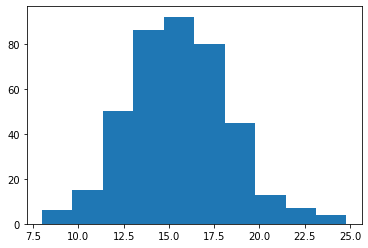

In [8]:
# 1. Badanie normalności rozkładu

# Graficzne badanie normalności rozkładu

plt.hist(data.acceleration)
plt.show()

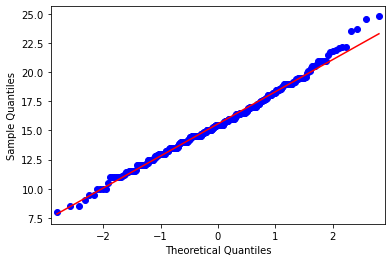

In [9]:
# Graficzne badanie normalności rozkładu

qqplot(data.acceleration, line='s')
plt.show()

In [10]:
# Badanie normalności rozkładu - Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(data.acceleration)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Dane mają rozkład Gaussa')
else:
    print('Dane nie mają rozkładu Gaussa')

stat=0.992, p=0.040
Dane nie mają rozkładu Gaussa


In [11]:
# Badanie normalności rozkładu - D'Agostino test
from scipy.stats import normaltest

stat, p = normaltest(data.acceleration)
print('stat=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Prawdopodobnie rozkład jest normalny')
else:
    print('Rozkład różni się od normalnego')

stat=7.628, p=0.022
Rozkład różni się od normalnego


In [12]:
# Badanie normalności rozkładu - Anderson-Darling Normality Test
from scipy.stats import anderson

result = anderson(data.acceleration)
print('stat=%.3f' % (result.statistic))

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Prawdopodobieństwo Gaussa na poziomie %.1f%%' % (sl))
    else:
        print('Prawdopodobieństwo nie-Gaussa na poziomie %.1f%%' % (sl))

stat=0.809
Prawdopodobieństwo nie-Gaussa na poziomie 15.0%
Prawdopodobieństwo nie-Gaussa na poziomie 10.0%
Prawdopodobieństwo nie-Gaussa na poziomie 5.0%
Prawdopodobieństwo Gaussa na poziomie 2.5%
Prawdopodobieństwo Gaussa na poziomie 1.0%


In [13]:
# Badanie współczynnika korelacji Pearsona
from scipy.stats import pearsonr

stat, p = pearsonr(data.displacement, data.acceleration)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Dane są niezależne')
else:
    print('Istnieje zależność między danymi')

stat=-0.544, p=0.000
Istnieje zależność między danymi


In [14]:
# Badanie współczynnika korelacji Spearman's Rank
from scipy.stats import spearmanr

stat, p = spearmanr(data.displacement, data.acceleration)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Dane są niezależne')
else:
    print('Istnieje zależność między danymi')

stat=-0.497, p=0.000
Istnieje zależność między danymi


In [15]:
# Badanie współczynnika korelacji Kendall's Rank
from scipy.stats import kendalltau

stat, p = kendalltau(data.displacement, data.acceleration)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Dane są niezależne')
else:
    print('Istnieje zależność między danymi')

stat=-0.352, p=0.000
Istnieje zależność między danymi


In [16]:
# Rozkład t-Studenta
from scipy.stats import ttest_ind

stat, p = ttest_ind(data.displacement, data.acceleration)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Średnie danych są równe')
else:
    print('Średnie danych nie są równe')

stat=34.018, p=0.000
Średnie danych nie są równe


In [17]:
# Sparowany rozkład t-Studenta
from scipy.stats import ttest_rel

stat, p = ttest_rel(data.displacement, data.acceleration)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Średnie danych są równe')
else:
    print('Średnie danych nie są równe')

stat=33.539, p=0.000
Średnie danych nie są równe


In [18]:
# Analiza równości wariancji - ANOVA test
from scipy.stats import f_oneway

stat, p = f_oneway(data.mpg, data.displacement, data.acceleration)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Wszystkie wariancje są równe')
else:
    print('Wariancje są różne')

Statistics=1101.620, p=0.000
Wariancje są różne


In [19]:
# Test równości rozkładów - Kruskal-Wallis H Test
from scipy.stats import kruskal

stat, p = kruskal(data.displacement, data.acceleration)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Rozkłady są równe')
else:
    print('Rozłady nie są równe')

stat=596.371, p=0.000
Rozłady nie są równe


In [20]:
# Test równości rozkładów - Friedman Test
from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(data.mpg, data.displacement, data.acceleration)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Rozkłady są równe')
else:
    print('Rozkłady nie są równe')

stat=726.096, p=0.000
Rozkłady nie są równe


## Regresja liniowa

In [21]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [22]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,1970,1,chevrolet_chevelle_malibu
1,15.0,8,350.0,165.0,3693.0,11.5,1970,1,buick_skylark_320
2,18.0,8,318.0,150.0,3436.0,11.0,1970,1,plymouth_satellite
3,16.0,8,304.0,150.0,3433.0,12.0,1970,1,amc_rebel_sst
4,17.0,8,302.0,140.0,3449.0,10.5,1970,1,ford_torino


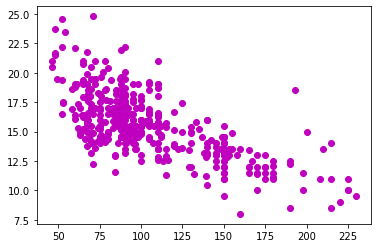

In [23]:
X = data['horsepower']
y = data['acceleration']
plt.scatter(X,y, color = "m")
plt.show()

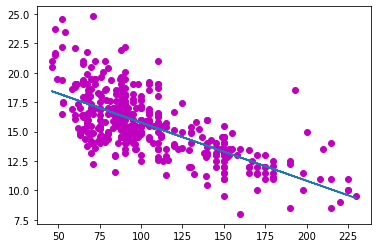

In [24]:
mask = ~np.isnan(X) & ~np.isnan(y)
slope, intercept, r, p, std_err = sc.linregress(X[mask],y[mask])
def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc,X))
plt.scatter(X,y, color = "m")
plt.plot(X, mymodel)
plt.show()